<a href="https://colab.research.google.com/github/Abinav160701/ML_Projects/blob/master/StartUpSuccessRatePrediction_MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/50_Startups.csv')

In [3]:
import matplotlib.pyplot as plt

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
X = df.iloc[:, :-1]   # independent data
y = df.iloc[:, -1]    # dependent data

In [6]:
df['State'].value_counts() ## count the cities

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [7]:
df.isnull().sum() ## checking null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
states = pd.get_dummies(X['State'], drop_first=True) # Converting State column into one-hot-encoding

In [9]:
X = X.drop('State', axis=1) # droping state column

In [10]:
X = pd.concat([X, states], axis=1)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regressor = LinearRegression()

In [15]:
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
print(y_pred[:5])
print(y_test[:])

[103015.20159796 132582.27760816 132447.73845174  71976.09851258
 178537.48221055]
28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64


In [18]:
from sklearn.metrics import r2_score

In [19]:
score = r2_score(y_test, y_pred)

In [20]:
print(score)

0.9347068473282423


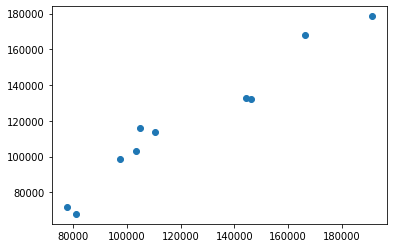

In [25]:
plt.scatter(y_test,y_pred)